In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Union, List

In [2]:
df = pd.read_csv('data\Training Data.csv')

# 1. Informações gerais do dataset

O dataset fornecido possui as seguintes colunas:

1. **income (Renda):** Renda do usuário, representada por um valor inteiro.

2. **age (Idade):** Idade do usuário, representada por um valor inteiro.

3. **experience (Experiência):** Experiência profissional do usuário em anos, representada por um valor inteiro.

4. **profession (Profissão):** Profissão do usuário, representada por uma string.

5. **married (Casado):** Indica se o usuário é casado ou solteiro, representado por uma string.

6. **house_ownership (Posse de Casa):** Indica se o usuário possui uma casa própria, aluga ou não possui casa, representado por uma string.

7. **car_ownership (Posse de Carro):** Indica se o usuário possui um carro, representado por uma string.

8. **risk_flag (Indicador de Risco):** Indica se o usuário entrou em inadimplência em um empréstimo, representado por uma string.

9. **current_job_years (Anos no Emprego Atual):** Número de anos de experiência no emprego atual, representado por um valor inteiro.

10. **current_house_years (Anos na Residência Atual):** Número de anos que o usuário reside na residência atual, representado por um valor inteiro.

11. **city (Cidade):** Cidade de residência do usuário, representada por uma string.

12. **state (Estado):** Estado de residência do usuário, representado por uma string.

Essas colunas fornecem informações sobre a situação financeira, demográfica e profissional dos usuários, sendo úteis para análises e modelagem preditiva, especialmente em relação ao indicador de risco (risk_flag), que pode indicar se um usuário entrou em inadimplência em um empréstimo com base nas outras variáveis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


Verifica-se que os tipos das variáveis correspondem à descrição do dataset. Vamos verificar uma amostra do dataset:

In [4]:
df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# 2. Exploração do dataset

Por meio da análise descritiva do dataset, percebe-se que ele segue coerência, no que tange senso comum, nos valores apresentados em cada coluna. Como, por exemplo, os valores de mínimo e máximo condizem com valores da realidade.

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,252000.0,1.260005e+05,7.274628e+04,1.0,63000.75,126000.5,189000.25,252000.0
income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.00,5000694.5,7477502.00,9999938.0
age,252000.0,4.995407e+01,1.706386e+01,21.0,35.00,50.0,65.00,79.0
experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.00,10.0,15.00,20.0
current_job_years,252000.0,6.333877e+00,3.647053e+00,0.0,3.00,6.0,9.00,14.0
current_house_years,252000.0,1.199779e+01,1.399037e+00,10.0,11.00,12.0,13.00,14.0
risk_flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.00,0.0,0.00,1.0


## 2.1. Conferindo a ausência de registros duplicados

Caso haja dois ou mais registros cujos valores de todas as colunas sejam coincidentes, será considerado um registro duplicado, apesar do ID.

In [10]:
verify_duplicated = pd.DataFrame([
        len(df) - np.sum(df.duplicated(subset=df.columns.difference(['id']))),
        np.sum(df.duplicated(subset=df.columns.difference(['id'])))
], index=['unique', 'duplicated'], columns=['value'])

verify_duplicated

,value
unique,252000
duplicated,0


## 2.2. Explorando a distribuição dos valores das colunas

In [118]:
def plot_column(df: pd.DataFrame, column: str, interval: List[Union[int, float]], include_risk: Optional[bool] = False) -> None:
    """
    Plota um gráfico de contagem para uma coluna, agrupando os valores em intervalos.

    Parâmetros:
    - df: DataFrame, o conjunto de dados.
    - column: str, o nome da coluna a ser plotada.
    - interval: List[Union[int, float]], uma lista de intervalos para agrupar os valores.
    - include_risk: bool, opcional, se True, as barras serão separadas por risco. Se False, será uma contagem geral.

    Exemplo de uso:
    plot_column(DataSet, 'nome_da_coluna', [0, 50, 100, 150, 200, float('inf')], include_risk=True)
    """
    # Configurações para melhor visualização dos gráficos
    sns.set(style="whitegrid", font_scale=1.2)

    plt.figure(figsize=(25, 10))

    # Agrupa os valores nos intervalos definidos
    if pd.api.types.is_numeric_dtype(df[column]):
        df['intervalos'] = pd.cut(df[column], bins=interval)
    else:
        df['intervalos'] = df[column]

    # Plota o gráfico de contagem
    if include_risk and 'risk_flag' in df.columns:
        ax = sns.countplot(data=df, x='intervalos', hue='risk_flag', palette='pastel')
    else:
        ax = sns.countplot(data=df, x='intervalos', palette='pastel')

    plt.title(f'Distribuição de {column} por Intervalo')

    # Adiciona os valores no topo de cada barra
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=15, color='black')

    # Remove a coluna temporária
    df.drop(columns=['intervalos'], inplace=True)

    plt.show()

Avaliando distribuição da coluna **income**.

Utilizaremos a transformação logarítmica para essa coluna, tendo em vista os valores altos. Essa transformação logarítmica é uma maneira de comprimir a escala dos valores, sendo particularmente útil quando se lida com dados que têm uma grande variação entre os valores. Isso pode tornar padrões e diferenças nos dados mais visíveis, especialmente em visualizações como histogramas e gráficos de densidade.

---
Exemplo fictício:

| Id | income | log_income |
|----|--------|------------|
| 1  | 10000  | 9.210440   |
| 2  | 50000  | 10.819798  |
| 3  | 100000 | 11.512935  |
| 4  | 1000000| 13.815511  |
| 5  | 500000 | 13.122364  |




C:\Users\gabya\AppData\Local\Temp\ipykernel_38400\500720145.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['log_income'], bins=30, kde=True, palette='pastel')


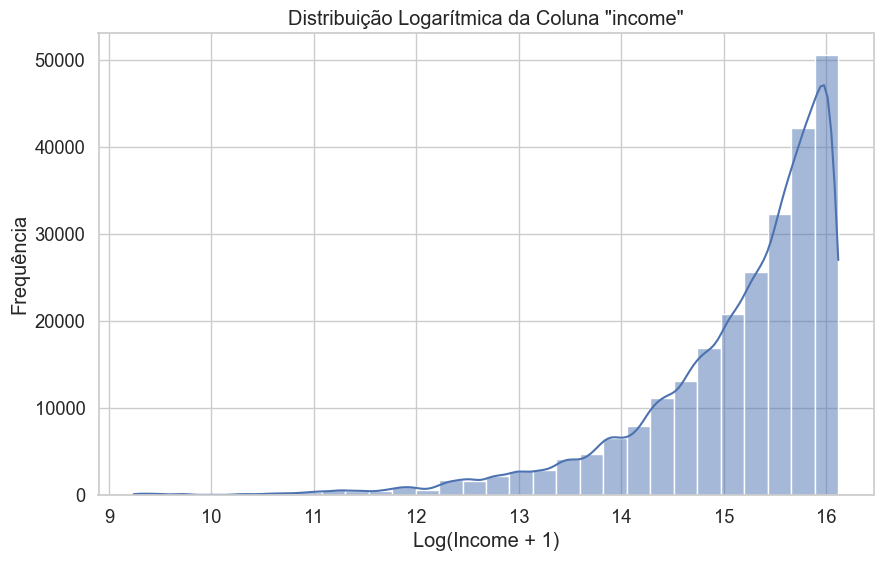

In [136]:
# Aplica a transformação logarítmica à coluna 'income'
df['log_income'] = np.log1p(df['income'])

# Plotagem do histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['log_income'], bins=30, kde=True, palette='pastel')
plt.title('Distribuição Logarítmica da Coluna "income"')
plt.xlabel('Log(Income + 1)')  # Adiciona 1 para evitar log(0)
plt.ylabel('Frequência')
plt.show()

df = df.drop('log_income', axis=True)

Avaliando distribuição da coluna **age**.

C:\Users\gabya\AppData\Local\Temp\ipykernel_38400\2225938351.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='intervalos', palette='pastel')


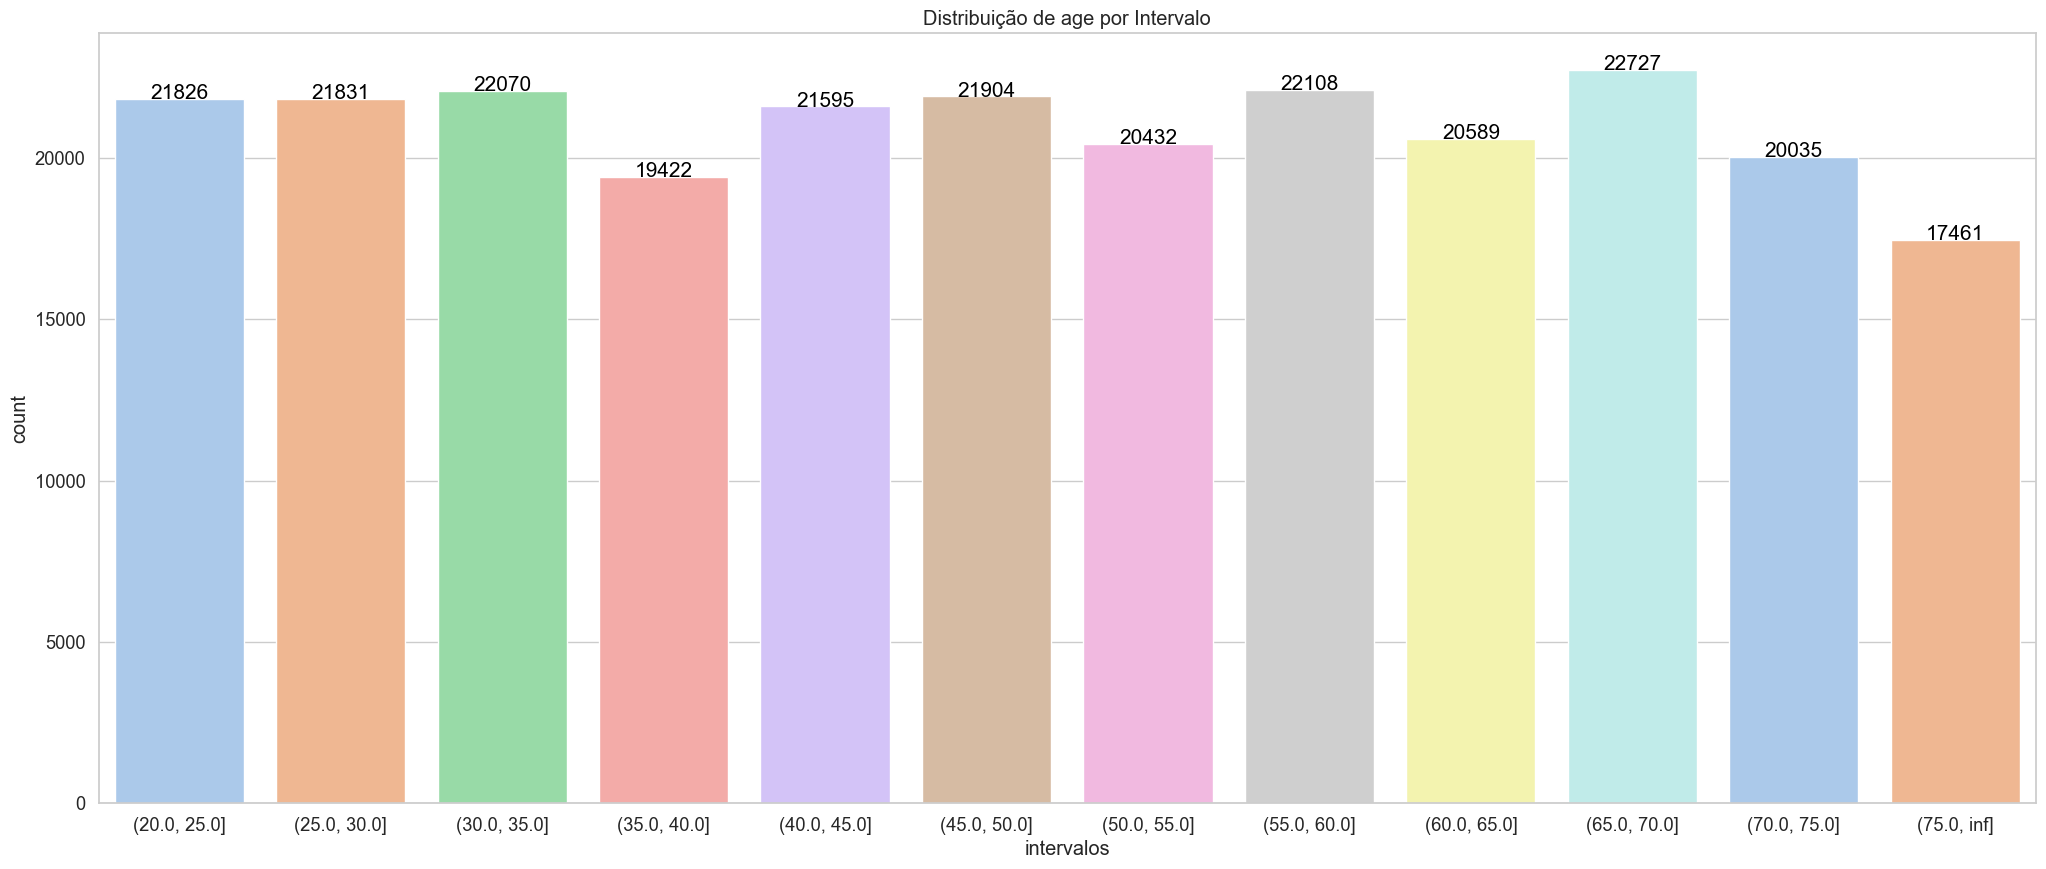

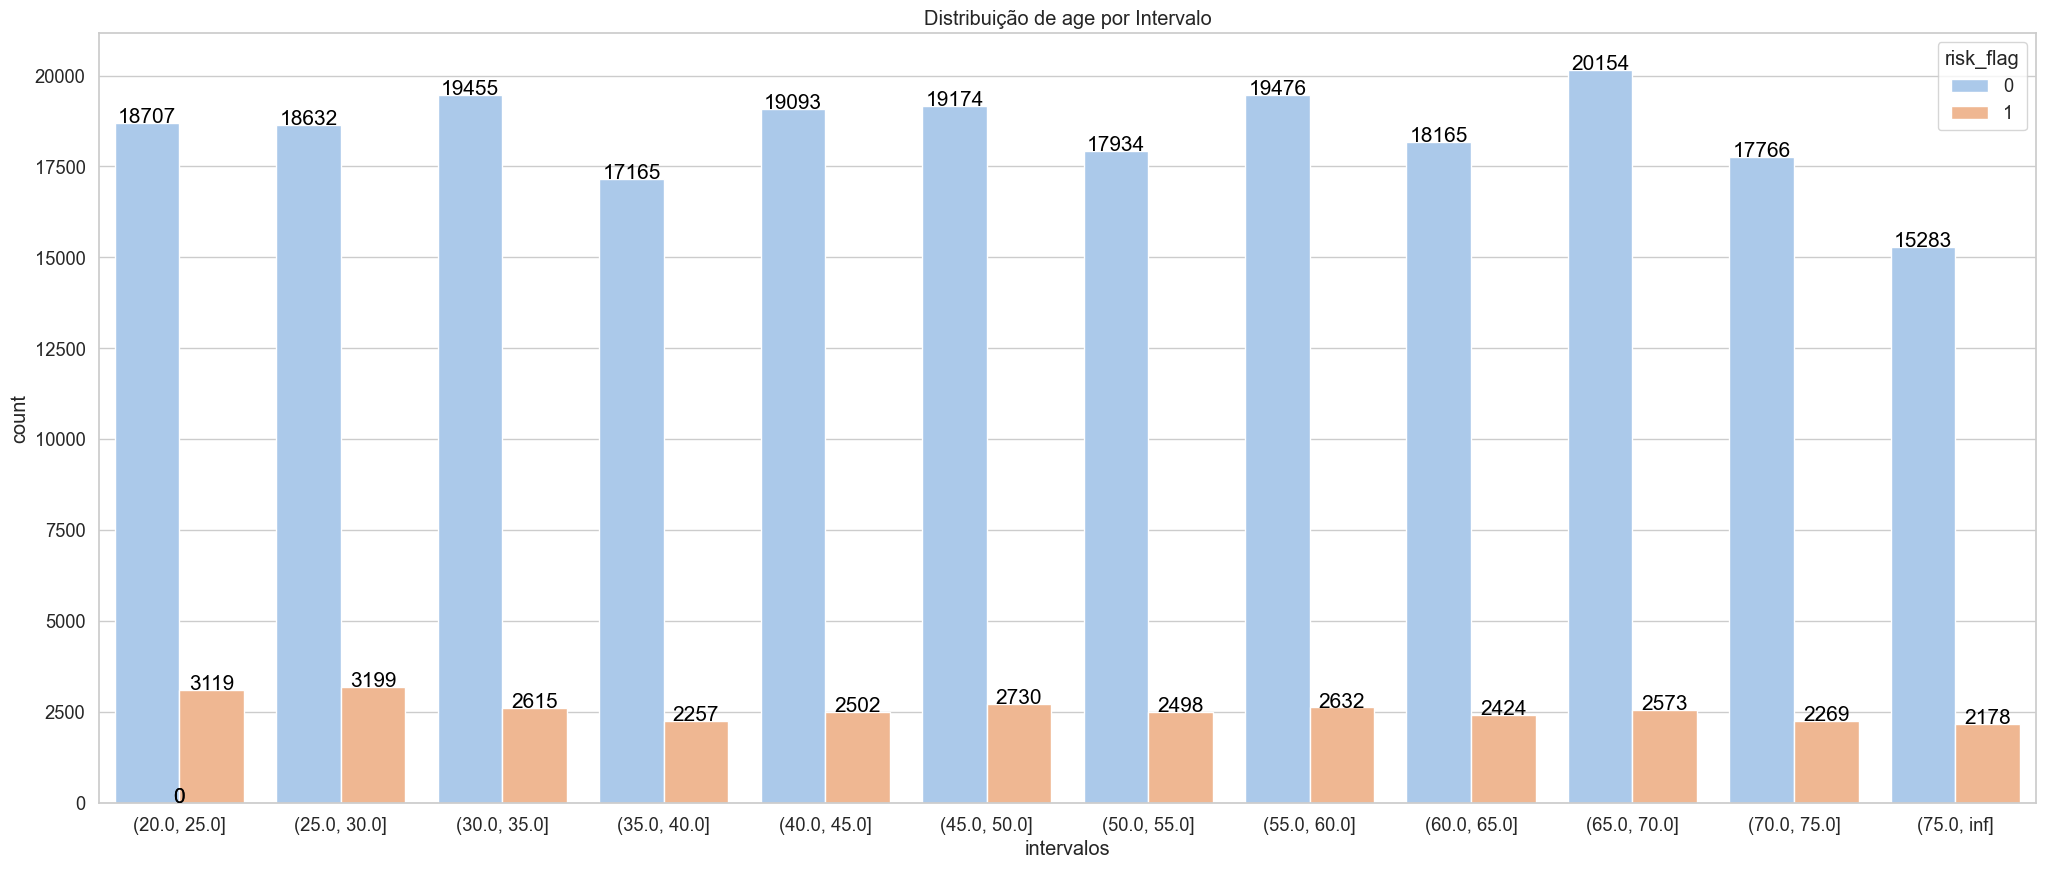

In [119]:
column = 'age'
interval = list(range(20, 80, 5)) + [float('inf')]

plot_column(df, column, interval)
plot_column(df, column, interval, include_risk=True)

Avaliando distribuição da coluna **experience**.

C:\Users\gabya\AppData\Local\Temp\ipykernel_38400\2225938351.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='intervalos', palette='pastel')


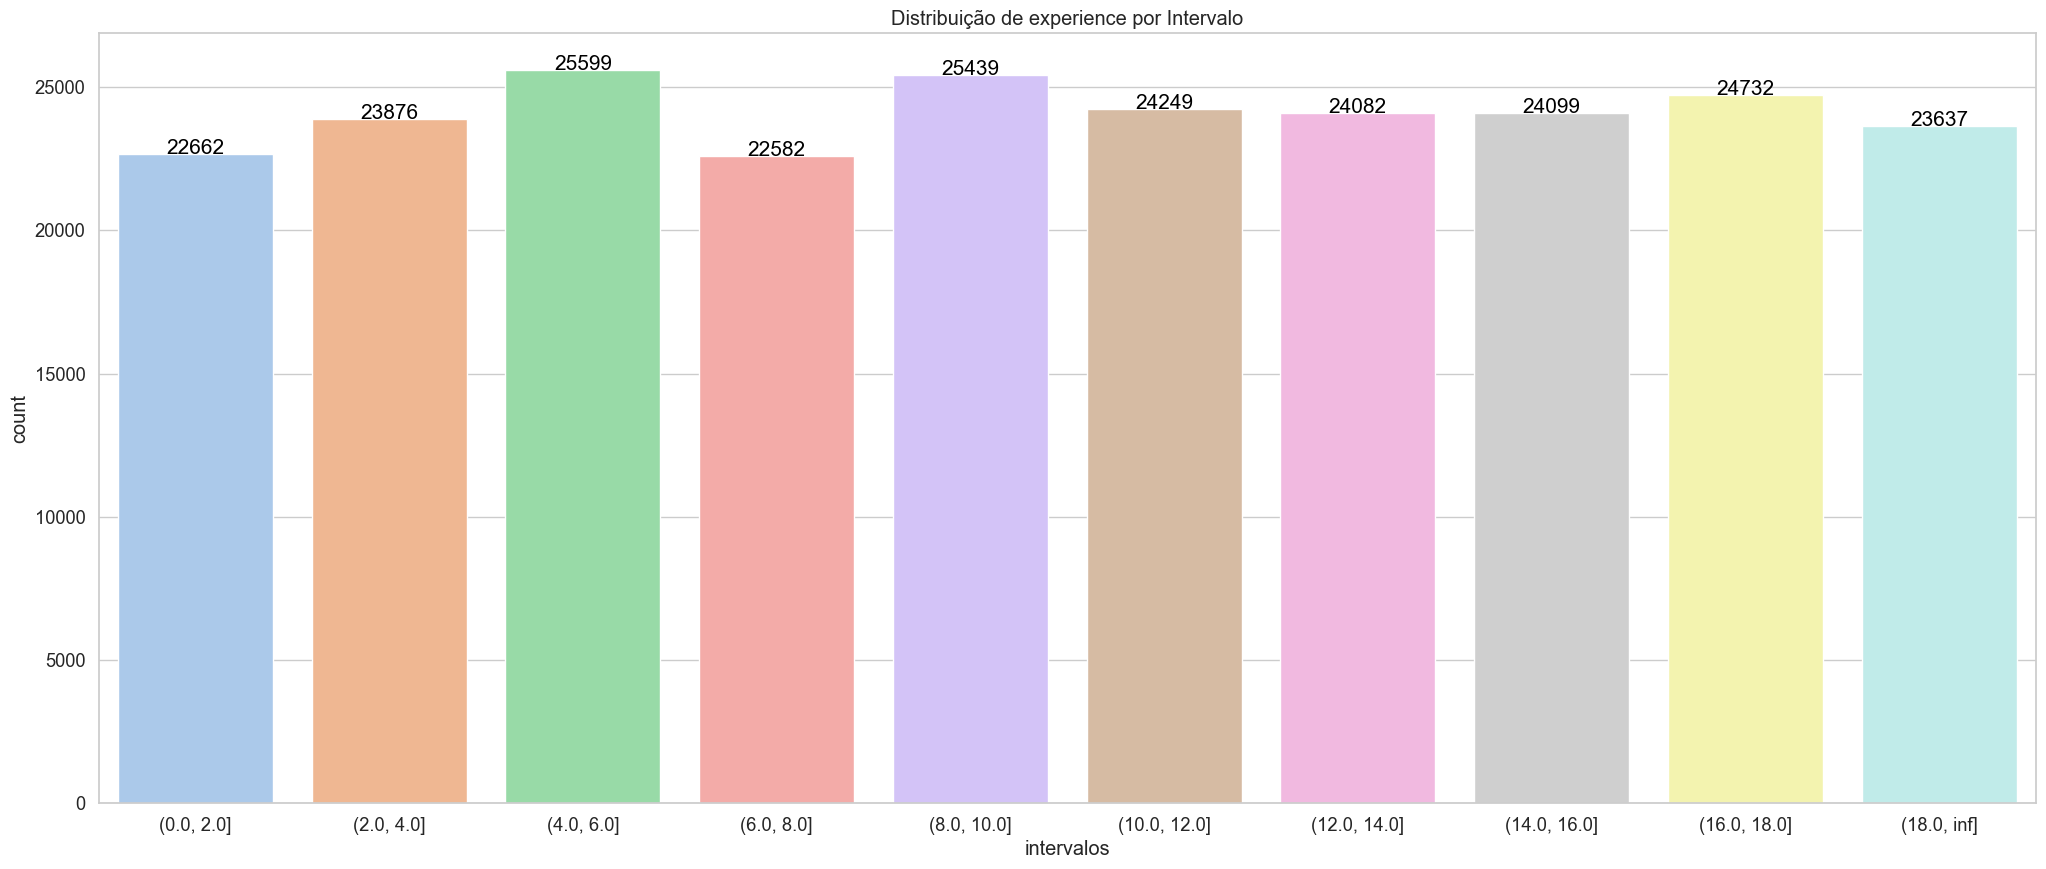

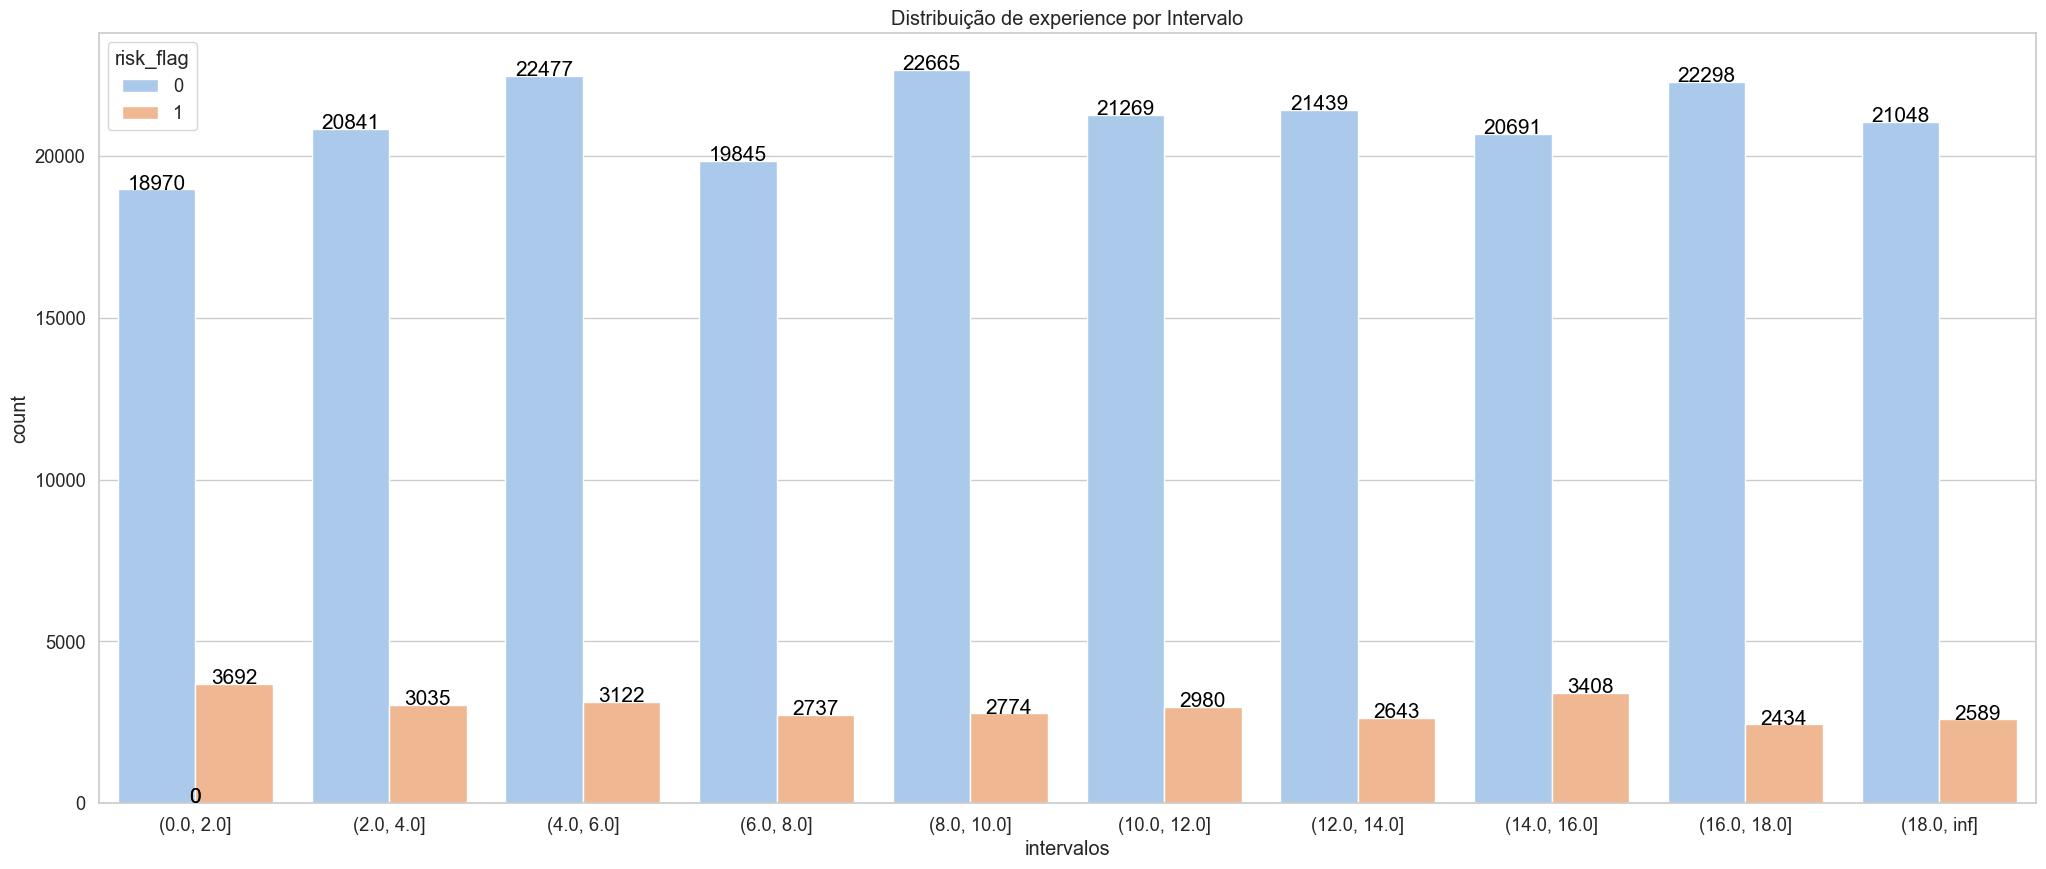

In [120]:
column = 'experience'
interval = list(range(0, 20, 2)) + [float('inf')]

plot_column(df, column, interval)
plot_column(df, column, interval, include_risk=True)

Avaliando distribuição da coluna **current_job_years**.

C:\Users\gabya\AppData\Local\Temp\ipykernel_38400\2225938351.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='intervalos', palette='pastel')


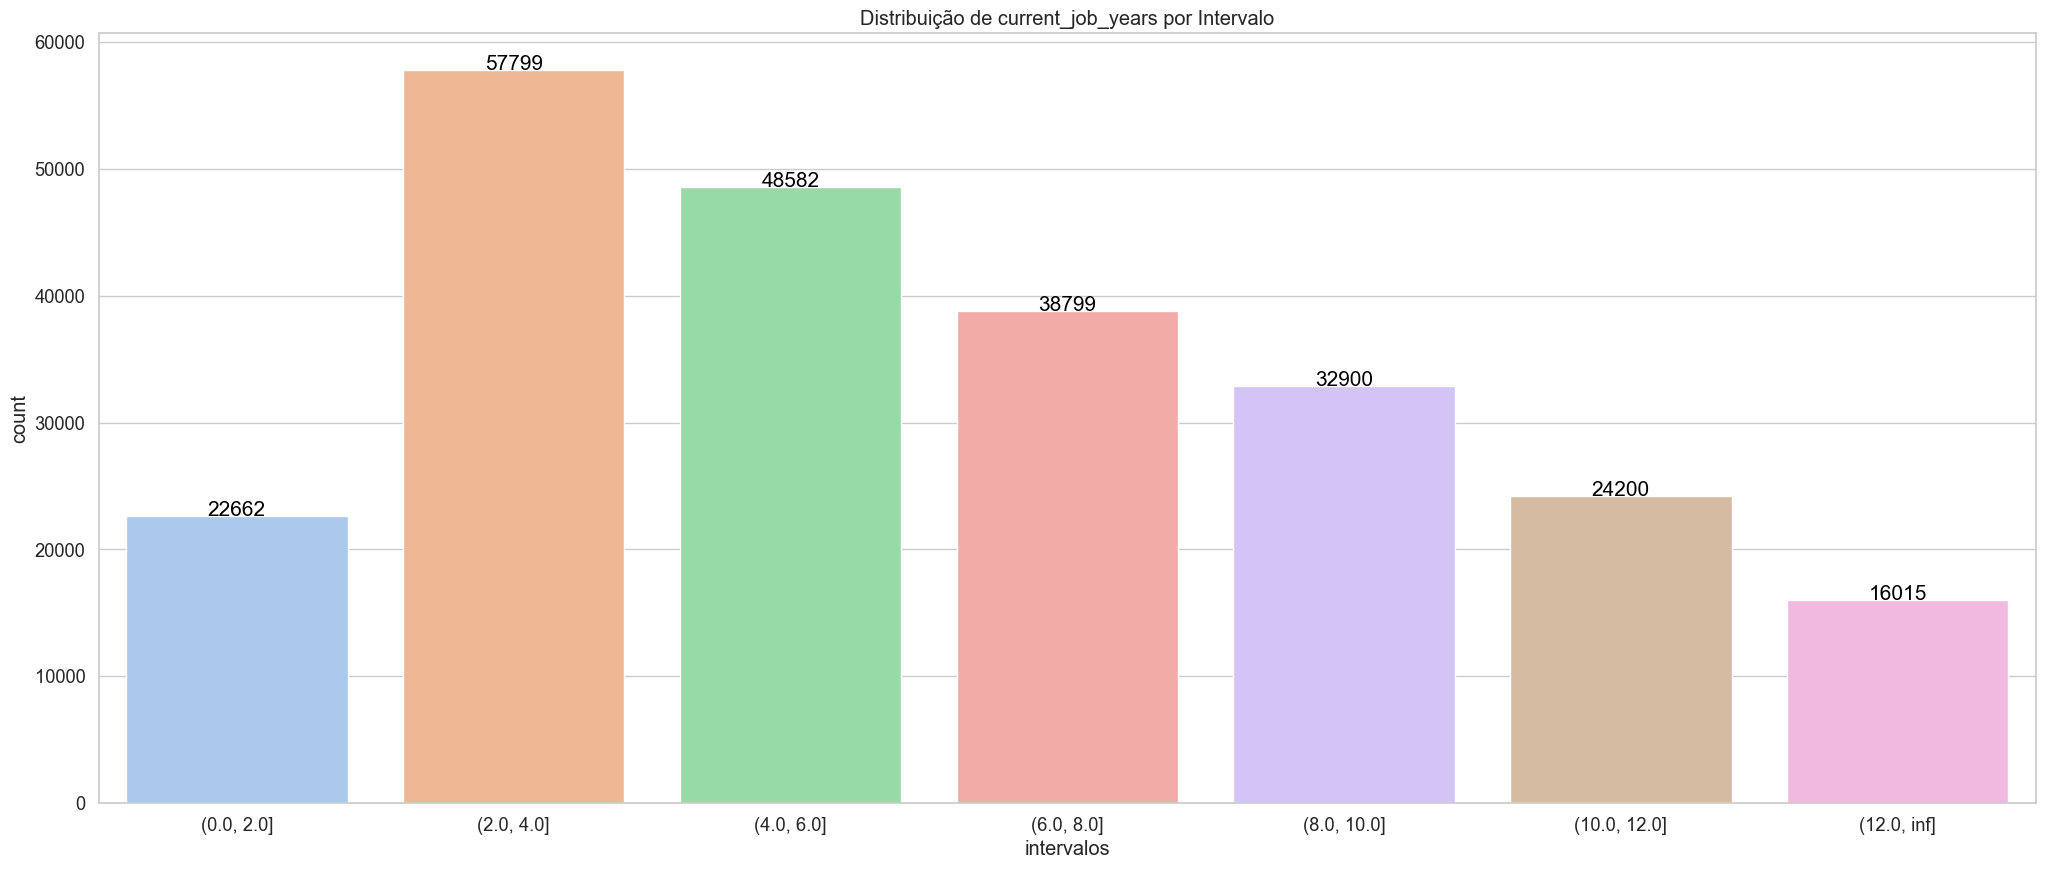

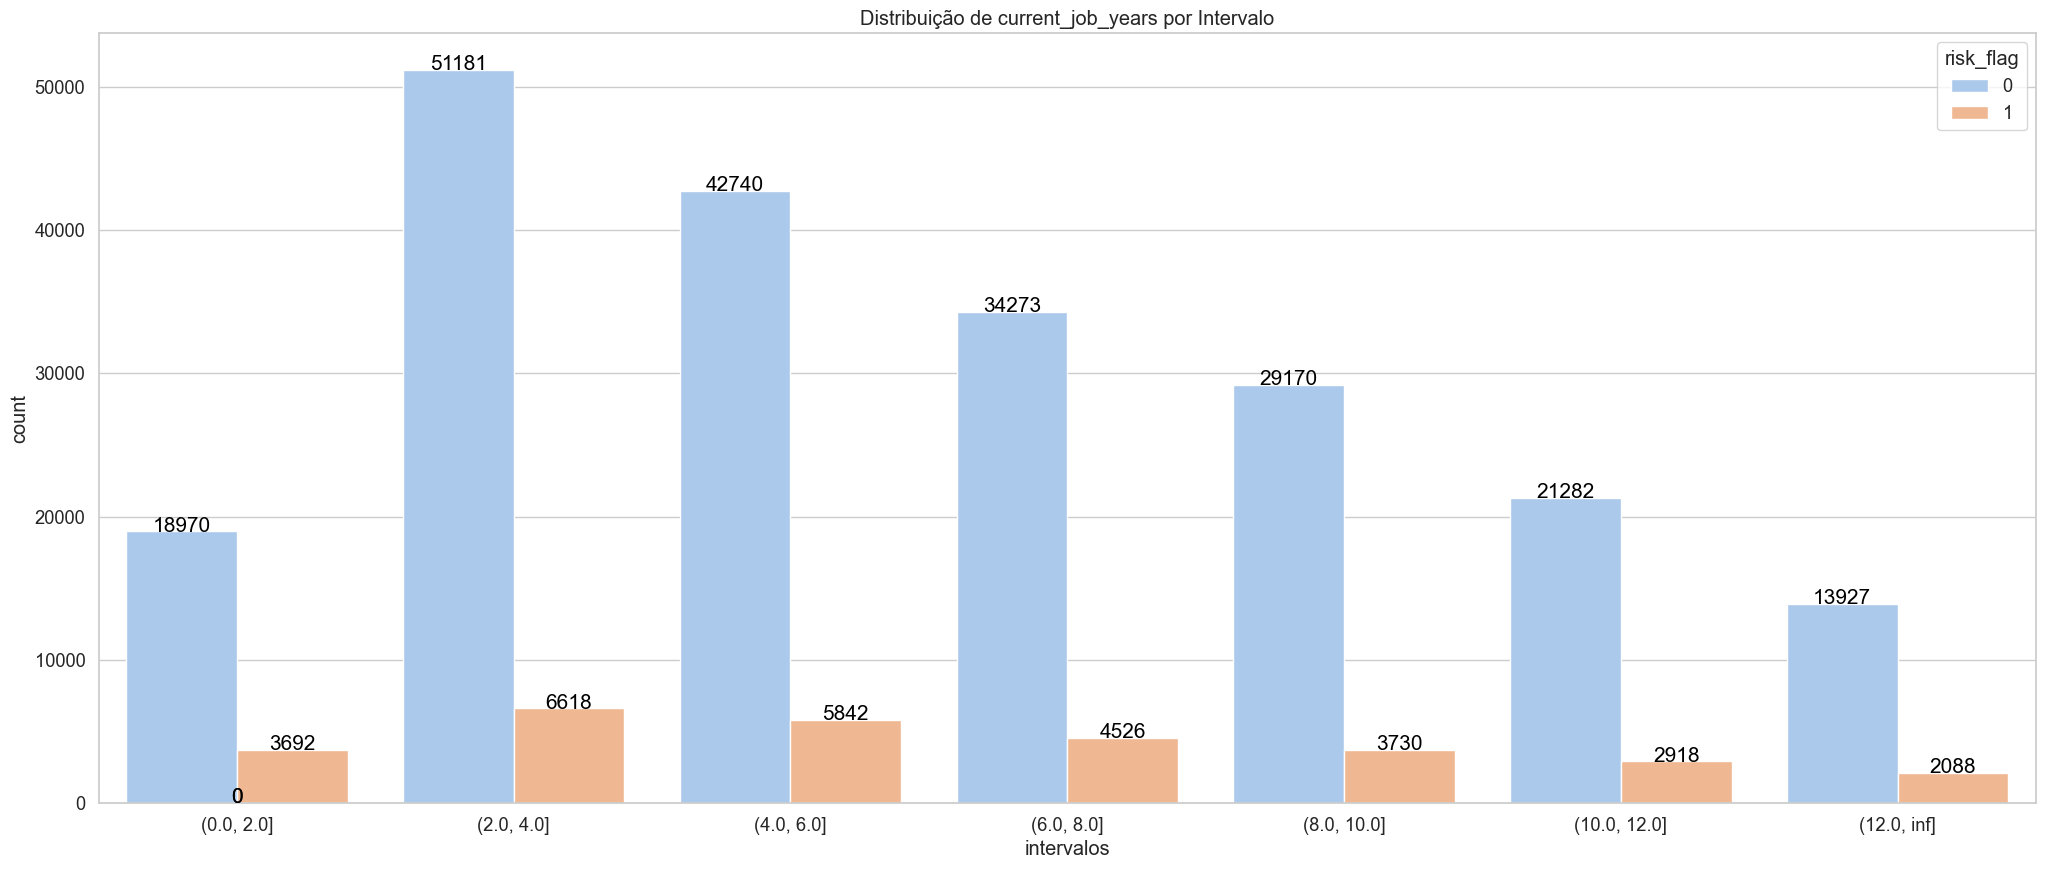

In [126]:
column = 'current_job_years'
interval = list(range(0, 14, 2)) + [float('inf')]

plot_column(df, column, interval)
plot_column(df, column, interval, include_risk=True)

Avaliando distribuição da coluna **current_house_years**.

C:\Users\gabya\AppData\Local\Temp\ipykernel_38400\2225938351.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='intervalos', palette='pastel')


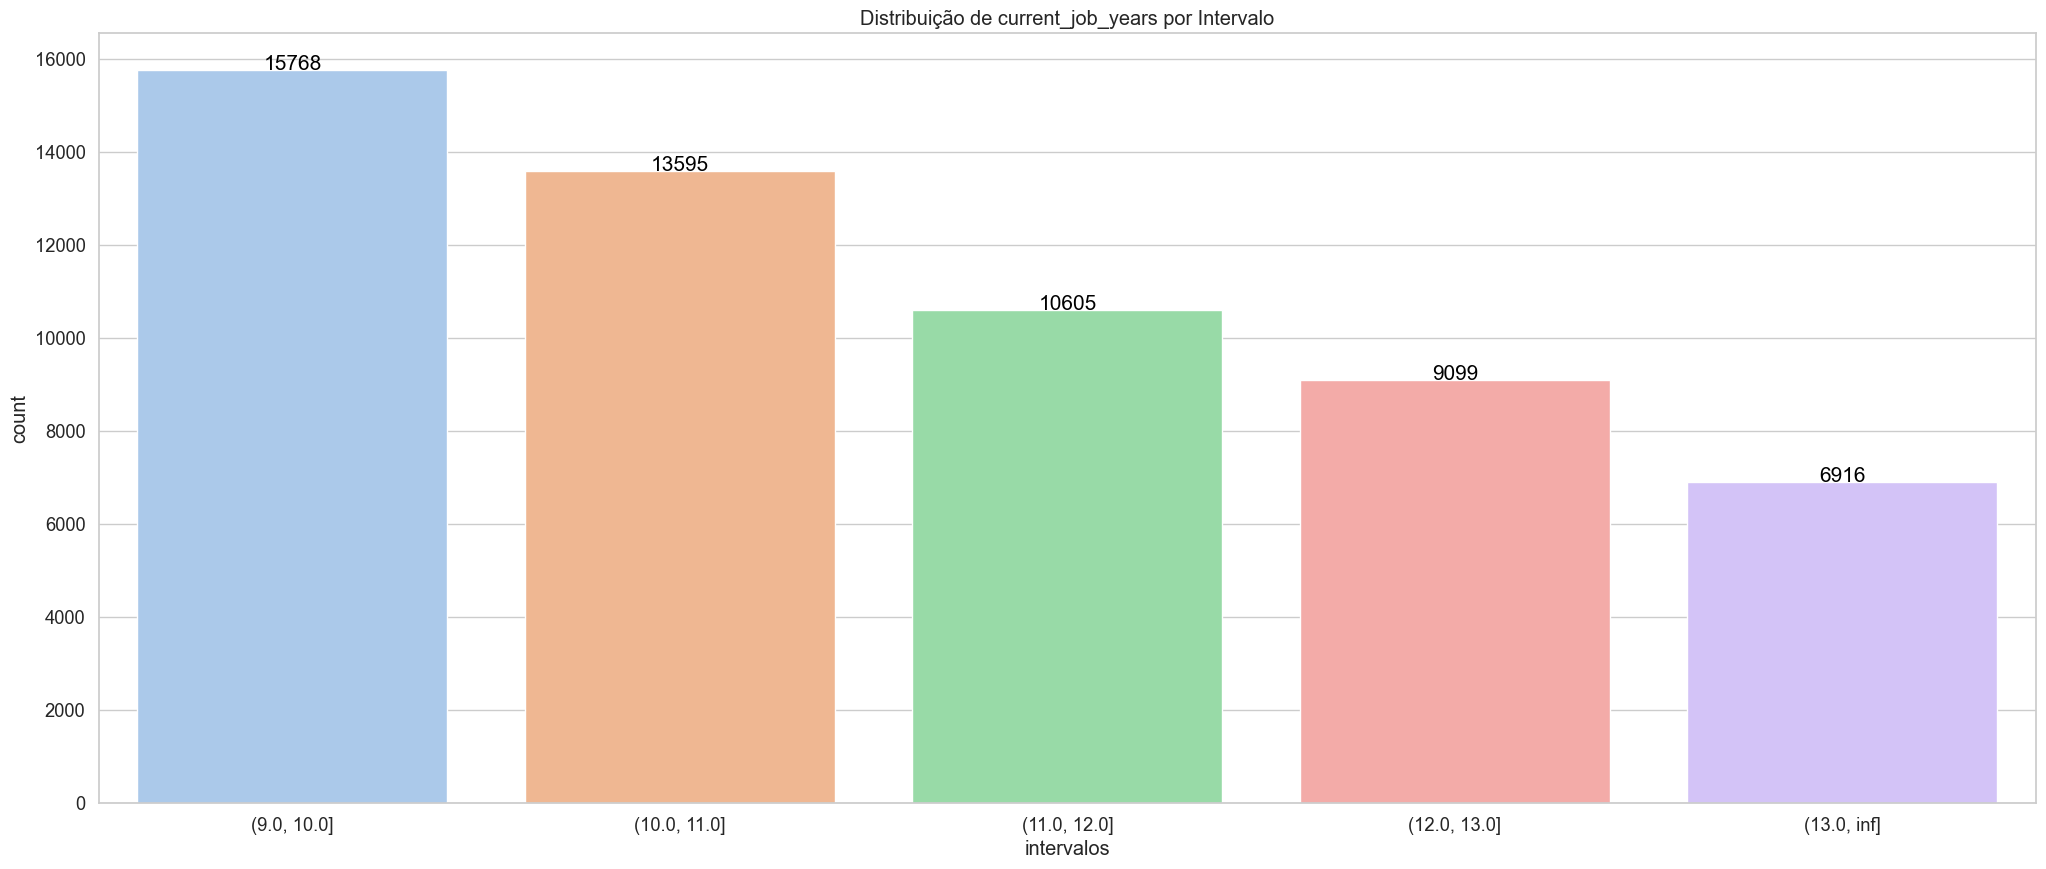

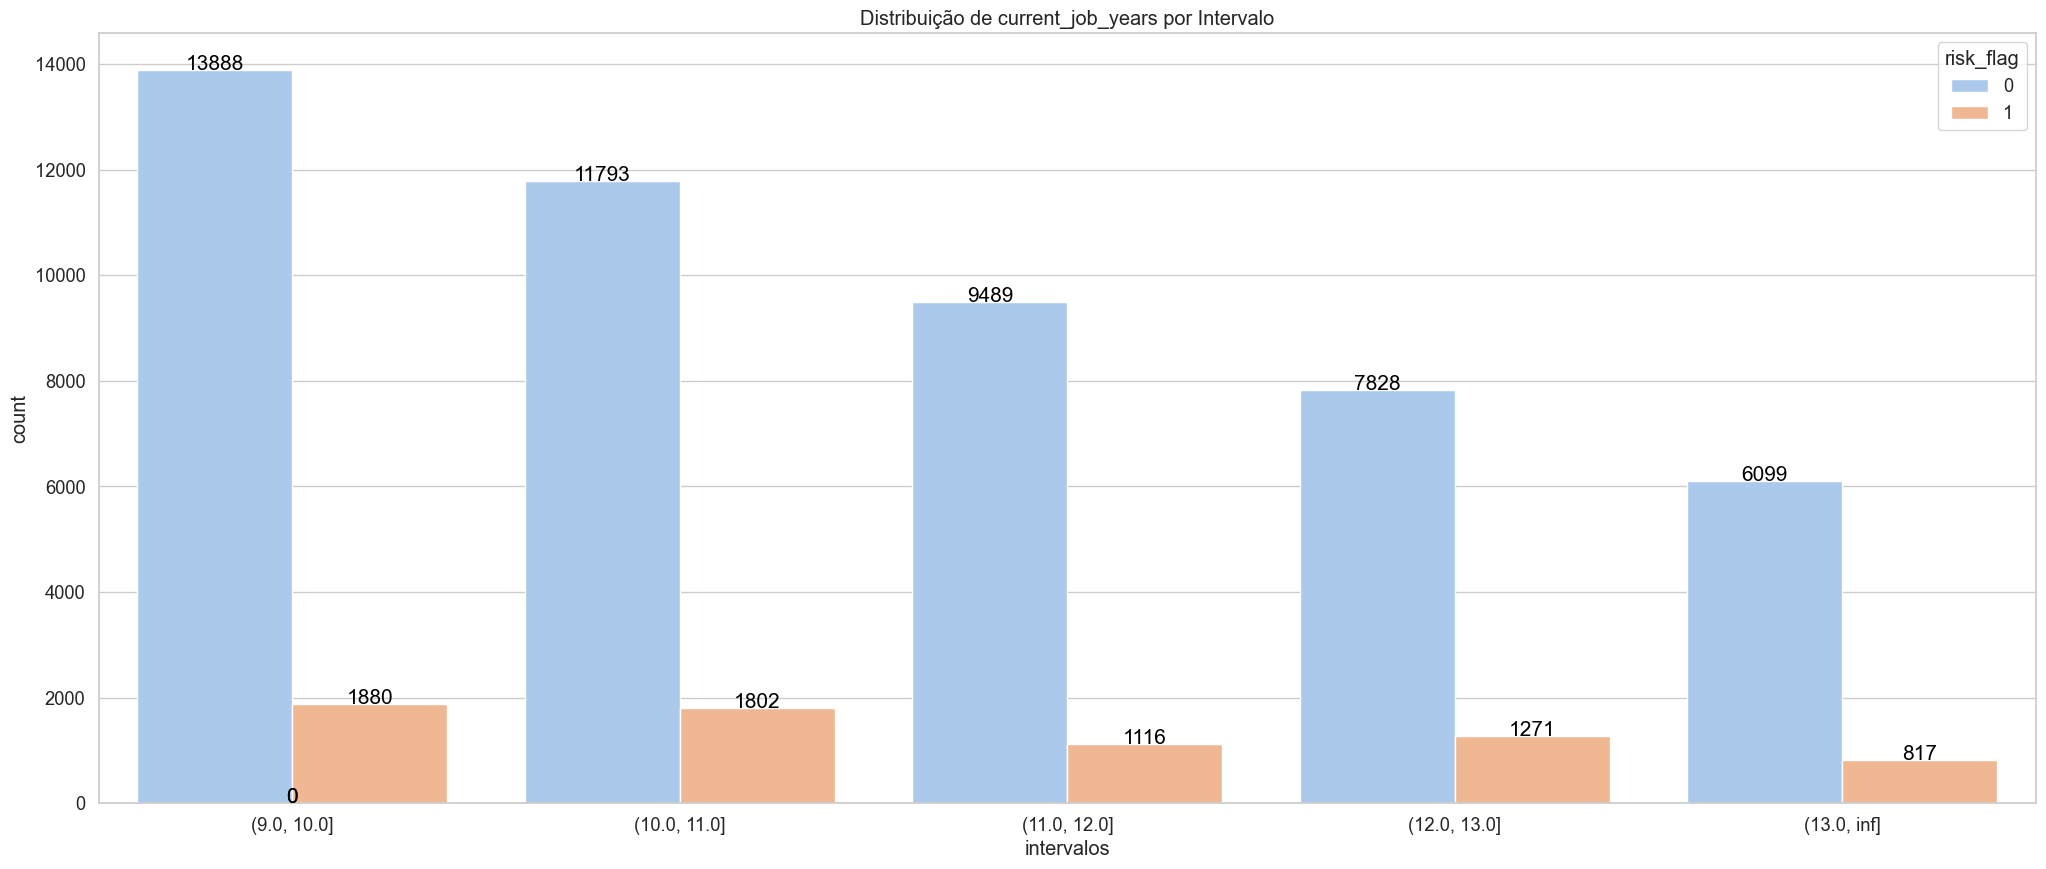

In [122]:
column = 'current_job_years'
interval = list(range(9, 14, 1)) + [float('inf')]

plot_column(df, column, interval)
plot_column(df, column, interval, include_risk=True)

Avaliando a distribuição das colunas categóricas.

C:\Users\gabya\AppData\Local\Temp\ipykernel_38400\2309338132.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df_category, x=column, palette='pastel')


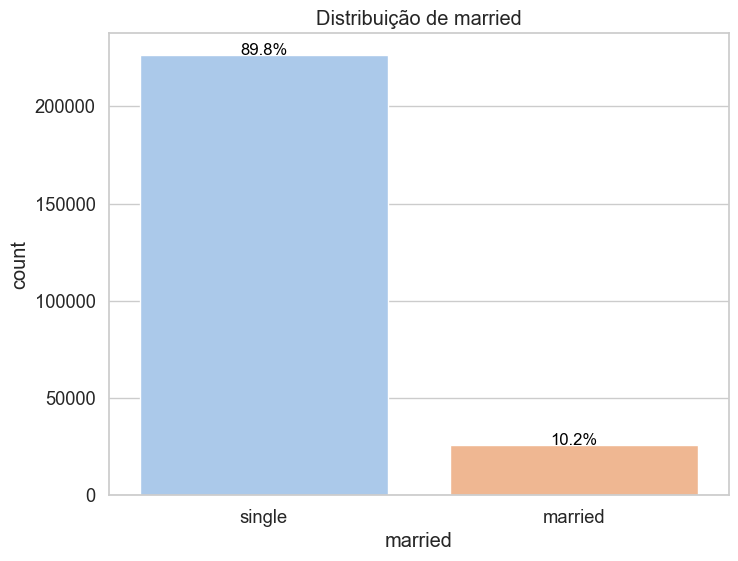

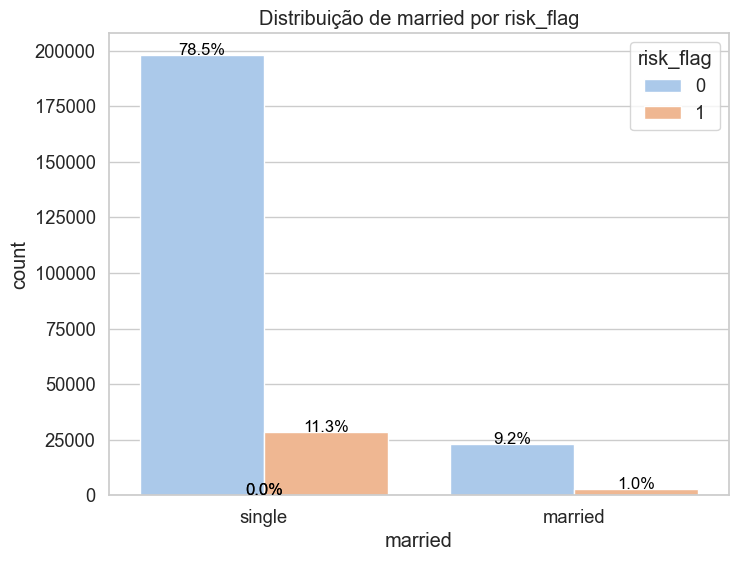

C:\Users\gabya\AppData\Local\Temp\ipykernel_38400\2309338132.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df_category, x=column, palette='pastel')


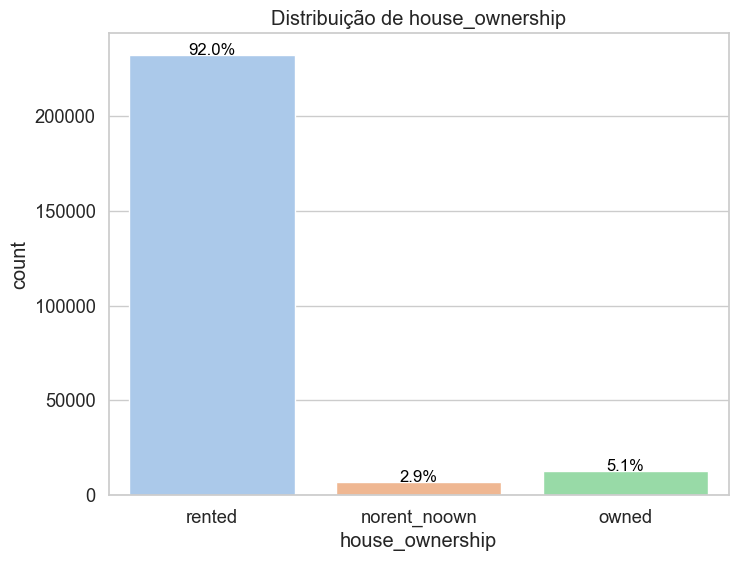

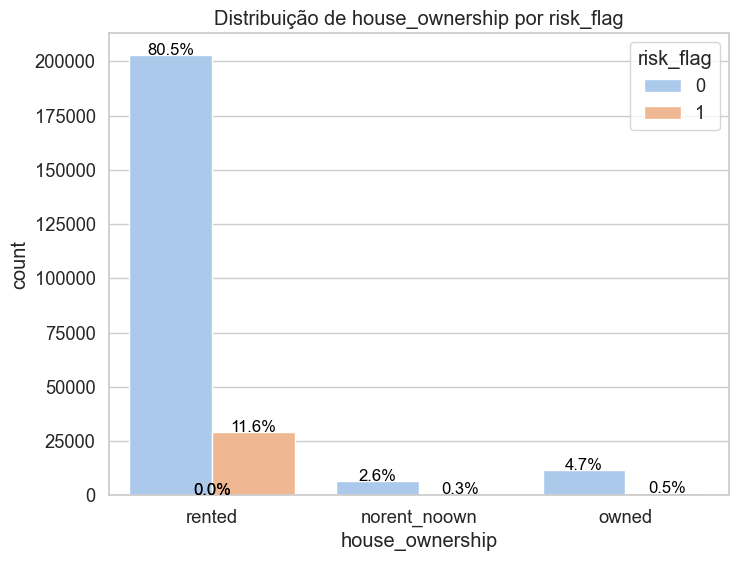

C:\Users\gabya\AppData\Local\Temp\ipykernel_38400\2309338132.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df_category, x=column, palette='pastel')


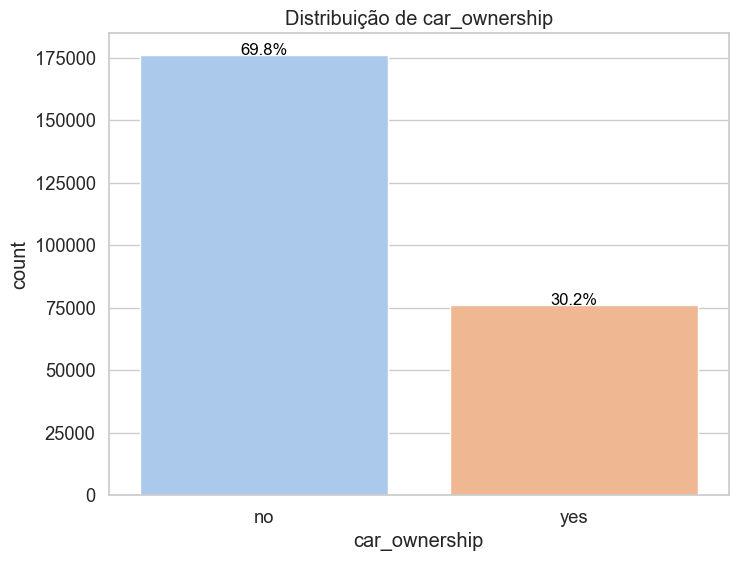

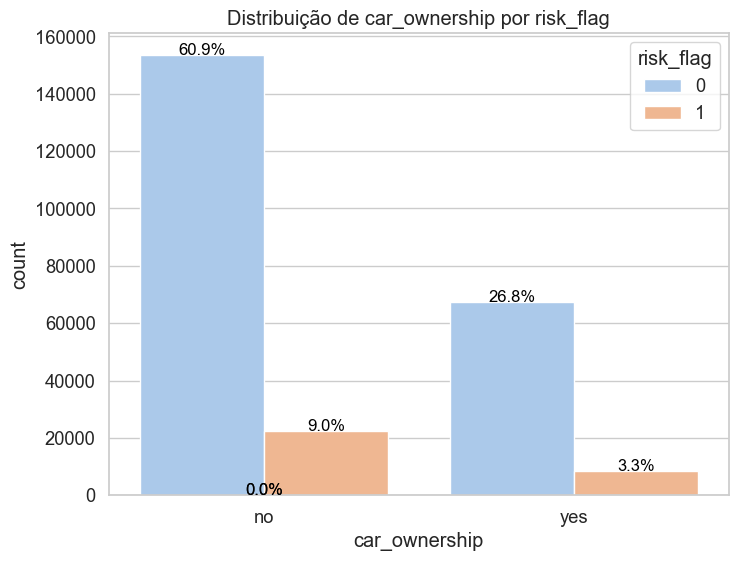

In [131]:
# Subconjunto de colunas categóricas e target
df_category = df[['married', 'house_ownership', 'car_ownership', 'risk_flag']]

# Seleciona colunas categóricas
column_categ = df_category.columns[:-1]  # Excluindo a coluna 'risk_flag'

# Plota gráficos de distribuição percentual para cada coluna categórica
for column in column_categ:
    plt.figure(figsize=(8, 6))
    
    # Gráfico de distribuição percentual
    ax1 = sns.countplot(data=df_category, x=column, palette='pastel')
    plt.title(f'Distribuição de {column}')

    # Adiciona os valores percentuais no topo de cada barra
    total = len(df_category[column])
    for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        ax1.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black')
    
    plt.show()
    
    # Gráfico de distribuição percentual por risk_flag
    plt.figure(figsize=(8, 6))
    ax2 = sns.countplot(data=df_category, x=column, hue='risk_flag', palette='pastel')
    plt.title(f'Distribuição de {column} por risk_flag')

    # Adiciona os valores percentuais no topo de cada barra
    for p in ax2.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        ax2.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black')

    plt.show()


Verificando as outras colunas separadamente por possuírem mais valores únicos.

In [95]:
profession = df.groupby('profession')
len(profession)

51

In [96]:
city = df.groupby('city')
len(city)

317

In [97]:
state = df.groupby('state')
len(state)

29

## 3. Pré-processamento

### One-Hot Encoding usando `get_dummies` do Pandas

Nosso conjunto de dados contêm variáveis categóricas, ou seja, aquelas que representam diferentes categorias ou rótulos, como profissões, estados civis, ou cidades. Algoritmos de aprendizado de máquina geralmente esperam que as entradas sejam numéricas, e é aqui que o One-Hot Encoding entra em cena.

#### Vantagens One-Hot Encoding

1. **Compatibilidade com Algoritmos**: Muitos algoritmos de machine learning, como regressão linear e árvores de decisão, exigem que todas as entradas sejam numéricas. Variáveis categóricas precisam ser convertidas para uma forma que os modelos possam entender.

2. **Prevenção de Viés**: Ao converter variáveis categóricas em numéricas, evitamos a atribuição de ordens ou valores que poderiam criar viés nos modelos. As colunas resultantes do One-Hot Encoding são binárias e não têm essa ambiguidade.


In [137]:
# Selecionar colunas do tipo 'object'
categorical_columns = df.select_dtypes(include=['object']).columns

# Aplicar one-hot encoding usando get_dummies
df_processed = pd.get_dummies(df, columns=categorical_columns)

In [138]:
df_processed

,Id,income,age,experience,current_job_years,current_house_years,risk_flag,married_married,married_single,house_ownership_norent_noown,...,state_Sikkim,state_Tamil_Nadu,state_Telangana,state_Tripura,state_Uttar_Pradesh,state_Uttar_Pradesh[5],state_Uttarakhand,state_West_Bengal,status_Com risco,status_Sem risco
0,1,1303835,23,3,3,13,0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,2,7574516,40,10,9,13,0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,3,3991815,66,4,4,10,0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,6256451,41,2,2,12,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,5,5768871,47,11,3,14,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,6,11,0,False,True,False,...,False,False,False,False,False,False,False,True,False,True
251996,251997,2843572,26,10,6,11,0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
251997,251998,4522448,46,7,7,12,0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
251998,251999,6507128,45,0,0,10,0,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [145]:
len(df.columns)

14

In [146]:
len(df_processed.columns)

413

In [ ]:
df_processed.to_csv('data/Training Data_processed.csv')